In [103]:
!pip install nbformat
import nbformat

nb = nbformat.read(open("/content/bigmart_sales_prediction_project.ipynb"), as_version=4)
if "widgets" in nb["metadata"]:
    del nb["metadata"]["widgets"]
nbformat.write(nb, open("/content/bigmart_sales_prediction_project.ipynb", "w"))

FileNotFoundError: [Errno 2] No such file or directory: '/content/bigmart_sales_prediction_project.ipynb'

## 🧠 PROJECT TITLE

“Groq-AI Generative Story & Game Design Agent”
A smart, creative AI that builds interactive worlds, remembers what happens, and generates art + story elements dynamically.

🚀 Project Overview

Goal:
To create an AI agent that can:

Generate creative storylines or game scenarios interactively.

Remember what happened in previous turns (“persistent memory”).

Retrieve relevant context from that memory.

Generate matching concept art (character or scene images).

Let the user “drive” the narrative interactively — like co-writing a story with AI.

This combines:

LLM (for storytelling)

Embeddings + Vector Memory (for long-term story memory)

Image Generation API (for scene/character concept art)

Interactive visual interface in Colab (Markdown storytelling + images)

### Setup and API Tst

In [53]:
!pip install groq langchain sentence-transformers faiss-cpu pillow ipywidgets

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import groq
import os
import IPython.display as display
import warnings
warnings.filterwarnings('ignore')

from groq import Groq
from IPython.display import display, Markdown
from google.colab import userdata

#Setup GROQ Api key
groq_api_key = userdata.get('GROQ_API_KEY')

if not groq_api_key:
  raise ValueError('Groq Api key not found. Please Recheck.')

#initialize GROQ Client
client = Groq(api_key=groq_api_key)

#Quick test
try:
  response = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
        {"role": "system", "content": "You are a friendly creative Ai"},
        {"role": "user", "content": "Write a short 2-line greeting for our Ai storytelling adventure"}])

  #print test result
  test_reply = response.choices[0].message.content
  display(Markdown(f"Groq Api connected Successfully!!\n\n**Test Response:**\n> {test_reply}"))

except Exception as e:
  print('Groq API test failed: ', e)


Groq Api connected Successfully!!

**Test Response:**
> "Get ready to weave tales, chase dreams, and forge unforgettable worlds - the curtain rises on our epic adventure together! Let's embark on a journey of imagination and discovery where the words are our magic."

### Genre Selector Setup

In [55]:
import ipywidgets as widgets
from IPython.display import display, Markdown

#Define available genres
genres = [
    "Fantasy 🧙‍♂️",
    "Science Fiction 🤖",
    "Mystery 🕵️‍♀️",
    "Romance 💞",
    "Horror 👻",
    "Adventure 🗺️",
    "Historical 🏰",
    "Mythology ⚡",
    "Comedy 😂"
]

#DRopdown widget for genre selection
genre_dropdown = widgets.Dropdown(
    options=genres,
    value='Fantasy 🧙‍♂️',
    description='Choose Genre: ',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

#Funtion to display selection
def on_genre_change(change):
  if change['type'] == 'change' and change['name'] == 'value':
    display(Markdown(f"### You've chosen the **{change['new']}** Universe! let's start world-building!!"))

genre_dropdown.observe(on_genre_change)

#Display the widget
display(Markdown('## Choose Your Story Genre'))
display(genre_dropdown)

## Choose Your Story Genre

Dropdown(description='Choose Genre: ', layout=Layout(width='50%'), options=('Fantasy 🧙\u200d♂️', 'Science Fict…

### World & Character Generator

In [56]:
import textwrap

#Capture the selected genre
selected_genre = genre_dropdown.value

#Prompt for world + character creation
prompt = f'''
You are a Creative AI storyteller.
Generate a vivid, imaginative world setup and introduce the main character for a story in the genre of {selected_genre}.

Include:
1. A short setting description (world, mood, tone, culture, atmosphere).
2. The protagonist: name, personality, background, goal.
3. Make it feel immersive, emotional and cinematic.
Keep the output within 250 words.
'''

#Query the LLaMa Model
response = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[

        {"role": "user", "content": prompt}],
        temperature=0.9,
        max_tokens=500)

story_intro = response.choices[0].message.content.strip()

#Display beautifully formatted output
display(Markdown('## Story World & Protagonist'))
display(Markdown(textwrap.fill(story_intro, width=100)))

## Story World & Protagonist

**The Realm of Aethereia**  In the dreamlike world of Aethereia, the skies are perpetually painted
with hues of sapphire and amethyst, as if the heavens themselves were a masterpiece of divine art.
The air is alive with an ethereal music, a symphony of whispers that only the most attuned can hear.
This mystical realm is a tapestry woven from the threads of ancient magic, where the very fabric of
reality is alive and responsive to the emotions of its inhabitants.  In the heart of Aethereia lies
the city of Elyria, a place of breathtaking beauty and darkness. The city's architecture is a blend
of organic and crystalline structures, as if the land itself had grown and shaped the buildings from
within. The Elyrians live in harmony with the land, their culture a delicate balance of magic and
reason. However, as the balance shifts, a sense of foreboding permeates the city.  **Meet Lyra
Flynn**  Lyra, a 22-year-old Elyrian, is a skilled Luminari, able to harness and manipulate the very
essence of light. With a wild tangle of black hair and piercing emerald eyes, Lyra's spirit is as
free as the wind. Her past is marked by tragedy, her family lost to the darkness that threatens to
consume Elyria. Driven by a desire to protect her people and restore balance to the realm, Lyra
embarks on a perilous quest to unite the fractured factions of Aethereia and confront the shadows
that loom over Elyria. With each step, Lyra's determination burns brighter, fueled by the whispers
of a long-forgotten prophecy that speaks of a chosen one, destined to bring light to the darkness.

### Generate Opening Scene/ Storyline

In [57]:
scene_prompt = f'''
Continue the story based on the previous setup.

Genre: {selected_genre}

You already have a world and a protagonist.
Now, write the opening scene of the story:
- Create emotional tension, tone and vivid imagery.
- Include at least one dialogue line.
- End with a subtle cliffhanger or myster to encourage continuation.

Keep it within 300-400 words, cinematic and captivating.
'''

scene_response = client.chat.completions.create(
    model='llama-3.1-8b-instant',
    messages=[
        {'role': 'user',
        'content': scene_prompt},
        {'role':'assistant', 'content':story_intro}
    ],
    temperature=0.85,
    max_tokens=700)

opening_scene = scene_response.choices[0].message.content.strip()

#Display beautifully formatted output
display(Markdown('## Opening Scene'))
display(Markdown(textwrap.fill(opening_scene, width=100)))

## Opening Scene

Little does Lyra know, her journey is about to take a turn that will shake the very foundations of
her world.  **"Lyra, I fear we're running out of time,"** a soft voice whispers in her ear, sending
shivers down her spine.  Lyra's eyes lock onto the speaker, her sister, Aria, a vision of serenity
amidst the turmoil. The air is heavy with unspoken words, as if the fate of Elyria hangs
precariously in the balance. In the silence, the whispers of the realm grow louder, a haunting
melody that warns of an impending catastrophe.

### Interactive Story Continuation (User Choices)

In [58]:
#We'll keep track of the story as it evolves
story_history = [story_intro, opening_scene]

def continue_story(user_choice):
  '''
  Continue the story interactively based on user's direction.
  The model remembers prior story context.
  '''

  prompt = f'''
  The story so far:
  {' '.join(story_history)}

  User input: {user_choice}

  Continue the story naturally, maintaining tone and genre ({selected_genre}).
  Include emotions, dialogue and vivid descriptions.
  Keep it within 250-400 words, end on a suspensful or emotional beat.
  '''

  response = client.chat.completions.create(
      model='llama-3.1-8b-instant',
      messages=[
          {'role': 'user', 'content': prompt}
      ],
      temperature=0.85,
      max_tokens=700)

  next_part = response.choices[0].message.content.strip()
  story_history.append(next_part)

  #Display the new story segment beautiufully
  display(Markdown('### Story Continues....'))
  display(Markdown(next_part))

#Example use- you can change the text in quotes below.
user_input = "Introduce a mysterious traveler who knows the hero's secret."
continue_story(user_input)

### Story Continues....

As Lyra's gaze locked onto Aria, a figure emerged from the shadows of the city's winding alleys. He was a stranger, his features shrouded in an aura of mystery, his eyes gleaming with a knowing intensity. Aria's eyes narrowed, her slender fingers instinctively weaving a subtle spell of protection around Lyra.

"Who is this?" Aria whispered, her voice laced with a hint of unease.

The stranger stepped forward, his long coat billowing behind him like a dark cloud. His eyes, a piercing shade of indigo, seemed to bore into Lyra's very soul. "I am known as Kael," he said, his voice low and smooth as silk. "And I've been searching for you, Lyra Flynn."

Lyra's heart skipped a beat as Kael's words hung in the air, their implications dripping with an unspoken weight. "How do you know my name?" she asked, her voice barely above a whisper.

Kael's lips curled into a faint smile, his eyes glinting with a knowledge that sent shivers down Lyra's spine. "I know your secret, Lyra. The one you've kept hidden even from your sister."

Aria's eyes widened, her hands tightening around Lyra's, a silent plea for protection. "What are you talking about?" Lyra demanded, her voice rising in alarm.

Kael's smile grew wider, his eyes flashing with a light that seemed almost... divine. "You are the chosen one, Lyra. The one spoken of in prophecy, the bringer of light to the darkness."

Lyra's world spun around her, the whispers of the realm growing deafening in her mind. Aria's grip on her arm tightened, her eyes wide with fear. "Lyra, what's happening?" she whispered.

As Lyra's eyes locked onto Kael, a shiver ran down her spine. She felt the weight of the prophecy settling upon her, the burden of a destiny that had been hidden in the shadows of her past.

### Story Memory & Visualization Dashboard

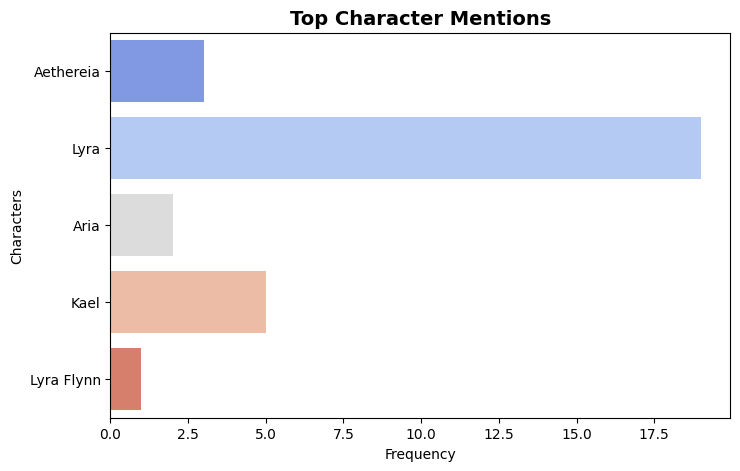

In [59]:
import spacy
import wordcloud
import collections
from collections import Counter
from wordcloud import WordCloud

#Now load small English model for named entity recognition
nlp = spacy.load('en_core_web_sm')

#Combine all story parts into one text
full_story = " ".join(story_history)

#Process text with spacy
doc = nlp(full_story)

#Extract character mentions (proper nouns)
characters = [ent.text for ent in doc.ents if ent.label_ in ['PERSON']]
character_freq = Counter(characters)

#Extract Thematic keywords (nouns)
keywords = [token.text.lower() for token in doc if token.is_alpha and not
token.is_stop and token.pos_ == 'NOUN']
keyword_freq = Counter(keywords)

#Visualize Character Frequency
plt.figure(figsize=(8,5))
sns.barplot(
    x=list(character_freq.values())[:10],
    y=list(character_freq.keys())[:10],
    palette='coolwarm')
plt.title('Top Character Mentions', fontsize=14, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Characters')
plt.show()


### WordCloud for Themes

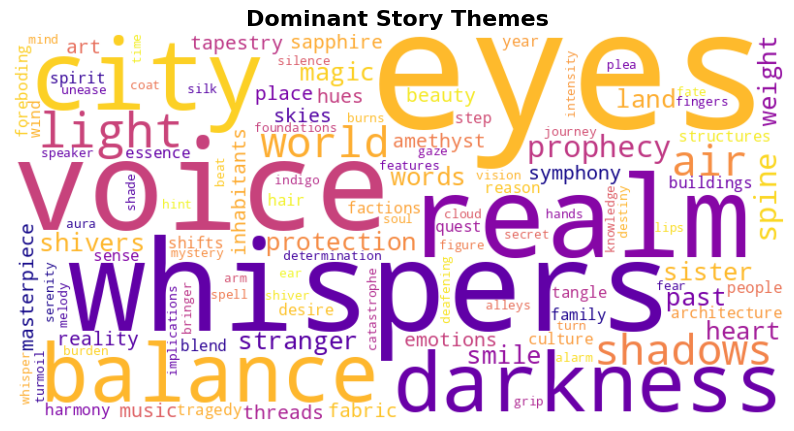

Story memory and visualization dashboard generated successfully!!!


In [60]:
plt.figure(figsize=(10,6))
wc = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate_from_frequencies(keyword_freq)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Dominant Story Themes', fontsize=16, fontweight='bold')
plt.show()
print('Story memory and visualization dashboard generated successfully!!!')

### Persistant Memory Saves and Continue System

In [61]:
import json
import datetime

#Define a save path
timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
save_path = f'story_memory_{selected_genre}_{timestamp}.json'

#Prepare data to save
story_data = {
    'genre': selected_genre,
    'story_parts': story_history,
    'created_on': timestamp}

#Save story memory to JSON
with open(save_path, 'w') as f:
  json.dump(story_data, f, indent=4)


display(Markdown(f'**Story Memory saved successfully!!**'))
display(Markdown(f" File saved as:--> `{save_path}`"))

#Display short summary
display(Markdown('### Story Summary Snapshot'))
for i, part in enumerate(story_history[-3:],1):
  display(Markdown(f"**Part {len(story_history)-3+i}:** {part[:400]}...."))



**Story Memory saved successfully!!**

 File saved as:--> `story_memory_Fantasy 🧙‍♂️_20251103_053319.json`

### Story Summary Snapshot

**Part 1:** **The Realm of Aethereia**

In the dreamlike world of Aethereia, the skies are perpetually painted with hues of sapphire and amethyst, as if the heavens themselves were a masterpiece of divine art. The air is alive with an ethereal music, a symphony of whispers that only the most attuned can hear. This mystical realm is a tapestry woven from the threads of ancient magic, where the very fabric of r....

**Part 2:** Little does Lyra know, her journey is about to take a turn that will shake the very foundations of her world.

**"Lyra, I fear we're running out of time,"** a soft voice whispers in her ear, sending shivers down her spine.

Lyra's eyes lock onto the speaker, her sister, Aria, a vision of serenity amidst the turmoil. The air is heavy with unspoken words, as if the fate of Elyria hangs precariously ....

**Part 3:** As Lyra's gaze locked onto Aria, a figure emerged from the shadows of the city's winding alleys. He was a stranger, his features shrouded in an aura of mystery, his eyes gleaming with a knowing intensity. Aria's eyes narrowed, her slender fingers instinctively weaving a subtle spell of protection around Lyra.

"Who is this?" Aria whispered, her voice laced with a hint of unease.

The stranger step....

### Load & Continue from Saved Story Memory

In [62]:
# ============================================================
# 🪄 Cell 8: Load & Continue from Saved Story Memory
# ============================================================

import json
import os
from IPython.display import Markdown, display

# List all saved story files
saved_files = [f for f in os.listdir() if f.startswith("story_memory_") and f.endswith(".json")]

if not saved_files:
    display(Markdown("⚠️ No saved stories found in this session. Please run the previous cell first."))
else:
    # Display available files
    display(Markdown("### 📂 Available Saved Stories"))
    for i, file in enumerate(saved_files, 1):
        display(Markdown(f"{i}. `{file}`"))

    # --- Load the most recent one automatically ---
    latest_file = sorted(saved_files)[-1]
    with open(latest_file, "r") as f:
        loaded_story = json.load(f)

    # Restore memory
    story_history = loaded_story["story_parts"]
    selected_genre = loaded_story["genre"]

    display(Markdown(f"✅ **Loaded Story Memory:** `{latest_file}`"))
    display(Markdown(f"🎭 Genre: **{selected_genre}**"))
    display(Markdown("### 🧠 Story Resumed Summary"))
    display(Markdown(f"**Total Segments:** {len(story_history)}"))
    display(Markdown(f"**Last Segment Preview:** {story_history[-1][:400]}..."))

    # --- Continue the story automatically ---
    user_choice = "Continue the story as the hero faces a new turning point."
    prompt = f"""
    The story so far:
    {' '.join(story_history)}

    Continue this story naturally.
    Maintain tone, style, and genre ({selected_genre}).
    Include emotional beats and character dialogue.
    Keep it within 300–400 words.
    """

    response = client.chat.completions.create(
        model="llama-3.1-8b-instant",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.85,
        max_tokens=700
    )

    continuation = response.choices[0].message.content.strip()
    story_history.append(continuation)

    display(Markdown("### ✨ Story Resumes..."))
    display(Markdown(continuation))


### 📂 Available Saved Stories

1. `story_memory_Fantasy 🧙‍♂️_20251103_052436.json`

2. `story_memory_Fantasy 🧙‍♂️_20251103_053319.json`

3. `story_memory_Fantasy 🧙‍♂️_20251103_040829.json`

✅ **Loaded Story Memory:** `story_memory_Fantasy 🧙‍♂️_20251103_053319.json`

🎭 Genre: **Fantasy 🧙‍♂️**

### 🧠 Story Resumed Summary

**Total Segments:** 3

**Last Segment Preview:** As Lyra's gaze locked onto Aria, a figure emerged from the shadows of the city's winding alleys. He was a stranger, his features shrouded in an aura of mystery, his eyes gleaming with a knowing intensity. Aria's eyes narrowed, her slender fingers instinctively weaving a subtle spell of protection around Lyra.

"Who is this?" Aria whispered, her voice laced with a hint of unease.

The stranger step...

### ✨ Story Resumes...

Lyra's mind reeled, her thoughts tangling like the black tendrils of her hair as she stared at Kael. The weight of the prophecy, long forgotten, now crashed down upon her like a thunderbolt. Aria's grip on her arm tightened, her voice laced with concern. "Lyra, what's happening? What's he talking about?"

Lyra's eyes locked onto Kael's, searching for answers, but his enigmatic smile seemed to hold a thousand secrets. "I... I don't know what you're talking about," she stammered, her voice shaking.

Kael's eyes glinted with a knowing intensity. "Don't you, Lyra? Don't you remember the whispers of your past, the dreams that have haunted you since childhood?"

Aria's eyes widened, her hands slipping from Lyra's arm as she took a step back, her voice barely above a whisper. "Lyra, no... it can't be true."

Lyra's thoughts churned, memories long buried rising to the surface like bubbles in a stagnant pool. She remembered the dreams, the visions of light and shadow that had plagued her since childhood. The whispers, the feeling of being chosen for something greater than herself. Her heart pounded in her chest as she turned to Kael, her voice barely above a whisper. "What do you want from me?"

Kael's smile grew wider, his eyes flashing with a light that seemed almost divine. "I want to help you, Lyra. To guide you on your journey, to teach you the secrets of your power."

Aria's voice cut through the tension, her voice laced with fear. "Lyra, be careful. We don't know anything about him."

Lyra's eyes locked onto Kael's, her heart torn between the thrill of discovery and the fear of the unknown. She felt the weight of the prophecy settling upon her, the burden of a destiny that had been hidden in the shadows of her past. "I'll be fine," she said, her voice firm, though her heart quaked with uncertainty.

### Generate Concept Art from Story Scene

In [63]:
!pip install -q diffusers transformers accelerate safetensors torch

### Generate Concept Art for Current Scene

Describe what you would like the image to focus on (or leave blank for automatic): 


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (89 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["lyra, what's happening? what's he talking ab"]
Token indices sequence length is longer than the specified maximum sequence length for this model (89 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["lyra, what's happening? what's he talking ab"]


  0%|          | 0/30 [00:00<?, ?it/s]

### Generated Concept Art for the scene

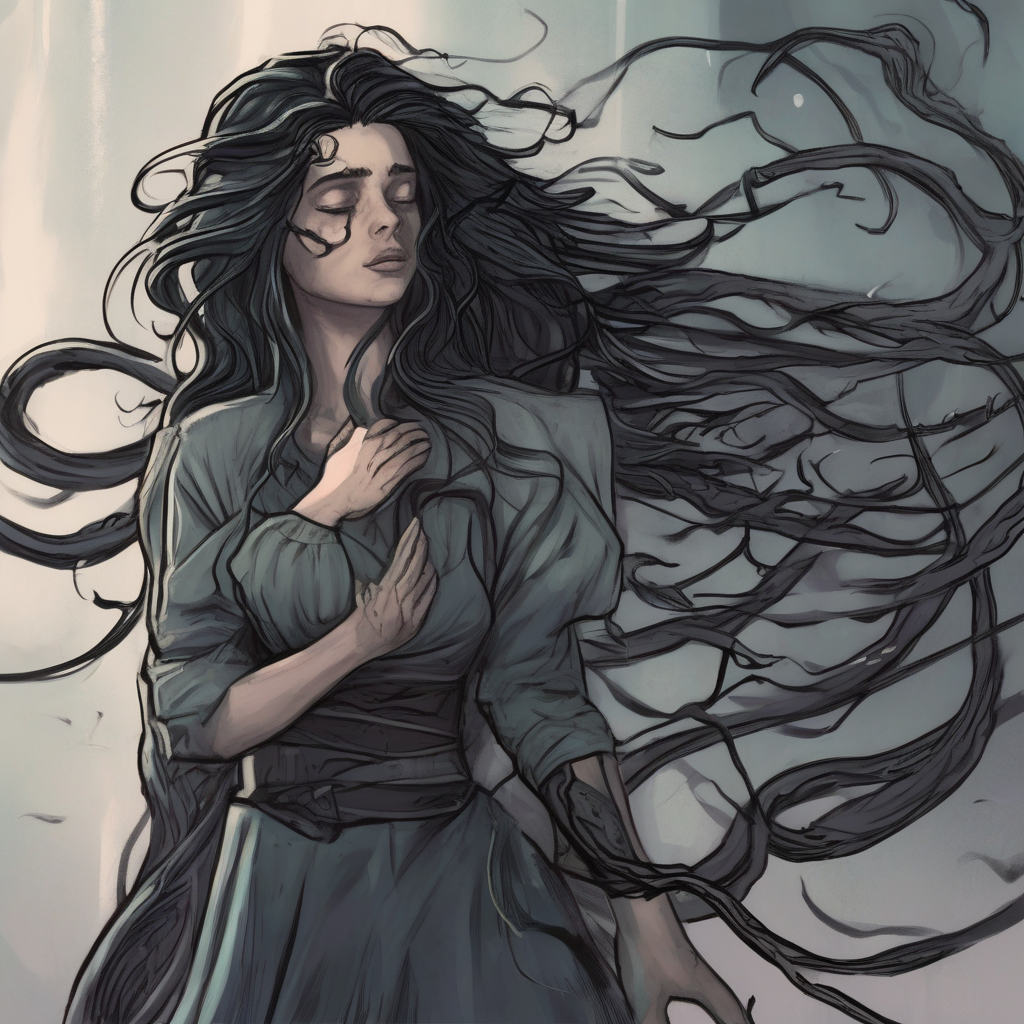

Image saved as `scene_art_Fantasy 🧙‍♂️_4.png`

In [65]:
import diffusers
from diffusers import StableDiffusionXLPipeline # Changed import
import torch
from PIL import Image
from huggingface_hub import notebook_login
from google.colab import userdata
import sys

#load the most recent story context
if not story_history:
  display(Markdown("No story found. Please generate or load one first."))
else:
  latest_scene = story_history[-1]

  display(Markdown('### Generate Concept Art for Current Scene'))
  user_prompt = input('Describe what you would like the image to focus on (or leave blank for automatic): ')

  #Build the image prompt
  if user_prompt.strip() == '':
    image_prompt = f'A high-quality conept art illustration inspired by this scene: {latest_scene[:300]}'
  else:
    image_prompt = f'{user_prompt}. Artistic style, cinematic lighting, ultra-detailed concept art.'

# Login to Hugging Face
try:
  hf_token = userdata.get('HF_TOKEN')
  # notebook_login() # This is not needed if using userdata
except Exception as e:
  print(f"Could not login to Hugging Face. Please ensure you have a HF_TOKEN secret set in Colab secrets. Error: {e}")
  # Exit if login fails
  raise SystemExit("Hugging Face token not found.")


# Determine the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize model (latest SDXL)
model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
if device == 'cuda':
    pipe = StableDiffusionXLPipeline.from_pretrained( # Changed pipeline class
        model_id,
        torch_dtype=torch.float16,
        variant="fp16"
    )
else:
    pipe = StableDiffusionXLPipeline.from_pretrained(model_id) # Changed pipeline class

pipe = pipe.to(device)

# Manually encode the prompt (This is not needed with StableDiffusionXLPipeline)
# prompt_embeds, pooled_prompt_embeds = pipe.encode_prompt(
#     prompt=image_prompt,
#     device=device,
#     num_images_per_prompt=1,
#     do_classifier_free_guidance=True,
# )

# Get time IDs for SDXL (This is handled internally by StableDiffusionXLPipeline)
# original_size = (1024, 1024)
# target_size = (1024, 1024)
# crops_coords = (0, 0)
# add_time_ids = pipe._get_add_time_ids(
#     original_size,
#     crops_coords,
#     target_size,
#     dtype=pooled_prompt_embeds.dtype,
#     text_encoder_projection_dim=pipe.text_encoder.config.projection_dim,
#     add_text_embeds=pooled_prompt_embeds.device.type == 'cpu'
# )
# add_time_ids = add_time_ids.to(device)


# Generate the image
if device == 'cuda':
  with torch.autocast(device_type='cuda'):
    image = pipe(
        prompt=image_prompt, # Changed to use 'prompt' argument
        num_inference_steps=30,
        guidance_scale=7.5,
        ).images[0]
else:
   with torch.no_grad():
    image = pipe(
        prompt=image_prompt, # Changed to use 'prompt' argument
        num_inference_steps=30,
        guidance_scale=7.5,
        ).images[0]


#Display the image
display(Markdown('### Generated Concept Art for the scene'))
display(image)

#optionally save the image
image_filename = f'scene_art_{selected_genre}_{len(story_history)}.png'
image.save(image_filename)
display(Markdown(f'Image saved as `{image_filename}`'))

### Interactive Story Branching

In [66]:
import random

#To ensure we have a story context
if not story_history:
  display(Markdown('No Story found. Please generate or load one first.'))
else:
  latest_scene = story_history[-1]
  display(Markdown('### Current Scene'))
  display(Markdown(latest_scene))

  #geenrate possible next actions

  #Create a structured prompt to generate 3 creative branching choices
  branch_prompt = f'''
  The current story scene is:
  -----
  {latest_scene}
  -------
  Generate **three** distinct creative choices for what happens next,
  Each choice should short (1-2 sentences) and immersive.
  '''

  response = client.chat.completions.create(
    model='llama-3.1-8b-instant',
    messages = [{'role':'user','content':branch_prompt}],
    temperature=0.9,
    max_tokens=250)

  choices_text = response.choices[0].message.content.strip()
  display(Markdown('### Possible Next Paths:'))
  print(choices_text)

  #Ask user to pick a path number
  user_choice = input('Enter the number (1,2,3) of the path you choose: ')

  #Combine user choice and story to continue
  continue_prompt = f'''
  {latest_scene}

  The chosen path is option {user_choice}. Continue the story accordingly.
  Write the next scene (150-250 words). Keep the tone and genre consistent.
  '''

  next_scene_response = client.chat.completions.create(
      model='llama-3.1-8b-instant',
      messages=[{'role':'user','content':continue_prompt}],
      temperature=0.8,
      max_tokens=500)

  next_scene = next_scene_response.choices[0].message.content.strip()

  #Display the new scene
  display(Markdown('### The Story Continues...'))
  display(Markdown(next_scene))

  #append to story history
  story_history.append(next_scene)
  #Save story so far to a file
  with open('current_story.txt','w') as f:
    f.write('\n'.join(story_history))

  display(Markdown('Story updated and saved as `current_story.txt`'))
  display(Markdown('You can now run the **concept art cell** again to visualize this new scene'))

### Current Scene

Lyra's mind reeled, her thoughts tangling like the black tendrils of her hair as she stared at Kael. The weight of the prophecy, long forgotten, now crashed down upon her like a thunderbolt. Aria's grip on her arm tightened, her voice laced with concern. "Lyra, what's happening? What's he talking about?"

Lyra's eyes locked onto Kael's, searching for answers, but his enigmatic smile seemed to hold a thousand secrets. "I... I don't know what you're talking about," she stammered, her voice shaking.

Kael's eyes glinted with a knowing intensity. "Don't you, Lyra? Don't you remember the whispers of your past, the dreams that have haunted you since childhood?"

Aria's eyes widened, her hands slipping from Lyra's arm as she took a step back, her voice barely above a whisper. "Lyra, no... it can't be true."

Lyra's thoughts churned, memories long buried rising to the surface like bubbles in a stagnant pool. She remembered the dreams, the visions of light and shadow that had plagued her since childhood. The whispers, the feeling of being chosen for something greater than herself. Her heart pounded in her chest as she turned to Kael, her voice barely above a whisper. "What do you want from me?"

Kael's smile grew wider, his eyes flashing with a light that seemed almost divine. "I want to help you, Lyra. To guide you on your journey, to teach you the secrets of your power."

Aria's voice cut through the tension, her voice laced with fear. "Lyra, be careful. We don't know anything about him."

Lyra's eyes locked onto Kael's, her heart torn between the thrill of discovery and the fear of the unknown. She felt the weight of the prophecy settling upon her, the burden of a destiny that had been hidden in the shadows of her past. "I'll be fine," she said, her voice firm, though her heart quaked with uncertainty.

### Possible Next Paths:

Here are three distinct creative choices for what happens next:

**Choice 1: Embracing the Prophecy**
Lyra's resolve hardened, and she took a step forward, her eyes locked onto Kael's. "Teach me," she whispered, the weight of the prophecy settling upon her like a mantle.

**Choice 2: Distrust and Deception**
Aria's voice whispered urgently in Lyra's ear, "Don't do it, Lyra. He's not what he seems." Lyra's eyes darted between Kael and Aria, her mind racing with suspicion.

**Choice 3: Unleashing Uncertainty**
The air seemed to vibrate with tension as Lyra's gaze drifted past Kael, her eyes scanning the shadows for any sign of truth. "What's out there?" she whispered, the darkness beyond the fire seeming to grow longer and more ominous.
Enter the number (1,2,3) of the path you choose: 1


### The Story Continues...

Lyra's words hung in the air, a fragile promise of determination that Aria and Kael exchanged skeptical glances. The air was heavy with tension as Kael nodded, his eyes never leaving Lyra's face. "Then let us begin," he said, his voice low and hypnotic.

With a wave of his hand, the darkness around them seemed to coalesce into a shimmering portal. Lyra's heart skipped a beat as Kael stepped through the shimmering threshold, beckoning her to follow. Aria's fingers closed around Lyra's wrist, her grip like a vice.

"Lyra, wait," she whispered urgently. "We don't even know what he's talking about."

But Lyra felt an inexorable pull, as if her very fate was tied to the secrets Kael promised to reveal. She took a deep breath, and with Kael's enigmatic smile still seared into her mind, she stepped through the portal alongside him.

The world blurred around her, a kaleidoscope of colors and sounds that threatened to overwhelm her senses. Aria's desperate cry was lost in the void, and Lyra felt the familiar tug of the prophecy drawing her forward, into a realm where her destiny awaited.

As the portal dissipated, Lyra found herself in a world unlike any she had ever known - one where ancient magic swirled in the air like a living, breathing entity.

Story updated and saved as `current_story.txt`

You can now run the **concept art cell** again to visualize this new scene

### Story Memory & Emotion Visualization Dashboard

### Story Memory & Emotion Visualization Dashboard

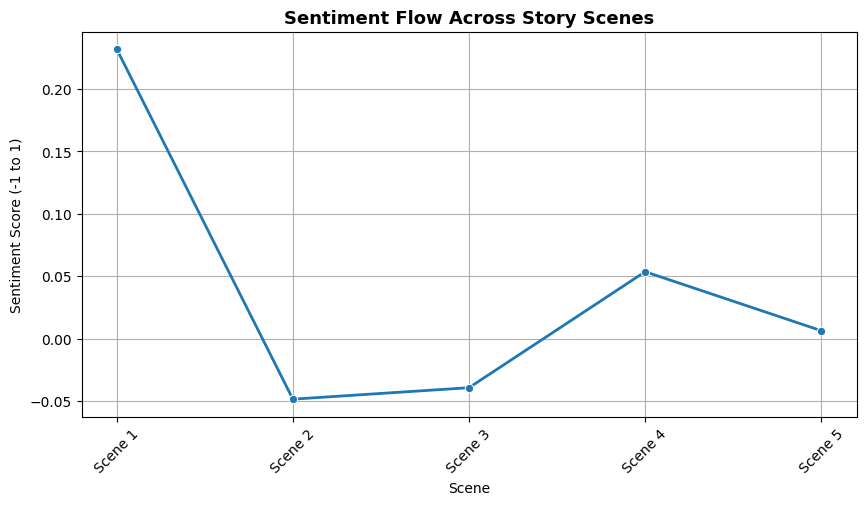

### Emotion Summary Table

,Scene,Emotion,Sentiment
0,Scene 1,Neutral,0.231890
1,Scene 2,Hope,-0.048611
2,Scene 3,Hope,-0.039418
3,Scene 4,Hope,0.053535
4,Scene 5,Hope,0.006250


Emotion analytics saved as `emotion_analytics_dashboard.csv`

In [69]:
import textblob
import wordcloud
from textblob import TextBlob
from wordcloud import WordCloud

#Ensuring that we have the history
if not story_history:
  display(Markdown('No story found. Please generate or load one.'))
else:
  display(Markdown('### Story Memory & Emotion Visualization Dashboard'))

  #Create a dataframe from story history
  df_story = pd.DataFrame({
      'Scene': [f'Scene {i+1}' for i in range(len(story_history))],
      'Text': story_history
  })
  #Compute sentiment for each scene
  sentiments = []
  emotions = []
  for scene_text in df_story['Text']:
    blob = TextBlob(scene_text)
    polarity = blob.sentiment.polarity
    #subjectivity = blob.sentiment.subjectivity
    sentiments.append(polarity)

    #Rough emotion classification
    if polarity > 0.4:
      emotions.append('Joy')
    elif polarity < 0.1:
      emotions.append('Hope')
    elif polarity < -0.4:
      emotions.append('Fear')
    elif polarity < -0.1:
      emotions.append('Sadness')
    else:
      emotions.append('Neutral')

df_story['Sentiment'] = sentiments
df_story['Emotion'] = emotions

#Now lets create a sentiment trend plot
plt.figure(figsize=(10,5))
sns.lineplot(data=df_story,x='Scene',y='Sentiment',marker='o',linewidth=2)
plt.title('Sentiment Flow Across Story Scenes',fontsize=13,fontweight='bold')
plt.xlabel('Scene')
plt.ylabel('Sentiment Score (-1 to 1)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Now display the emotion summary table
display(Markdown('### Emotion Summary Table'))
display(df_story[['Scene','Emotion','Sentiment']])

#Save the emotion analytics
df_story.to_csv('emotion_analytics_dashboard.csv',index=False)
display(Markdown('Emotion analytics saved as `emotion_analytics_dashboard.csv`'))


### Character & Theme Intelligence Layer

### Character & Theme Intelligence Layer

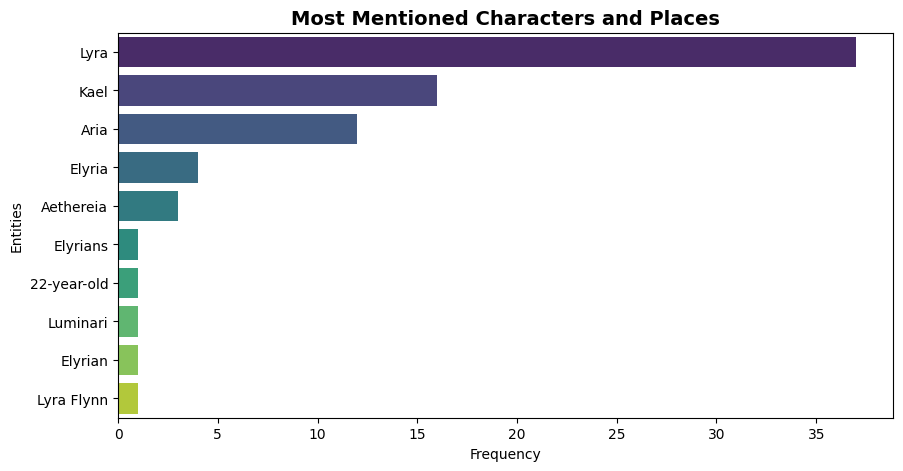

In [70]:
import spacy
#Load spacy for entity recognition (English core)
nlp = spacy.load('en_core_web_sm')

#Ensure the story exists
if not story_history:
  display(Markdown('No story found. Please generate or load one.'))
else:
  display(Markdown('### Character & Theme Intelligence Layer'))

  #Build a Dataframe
  df_story = pd.DataFrame({
      'Scene': [f'Scene {i+1}' for i in range(len(story_history))],
      'Text': story_history
  })
  #Now extract named entities (Characters , places)
  all_entities = []
  for scene_text in df_story['Text']:
    doc = nlp(scene_text)
    scene_entities = [(ent.text, ent.label_) for ent in doc.ents]
    all_entities.append(scene_entities)

  df_story['Entities'] = all_entities

  #Flatten entities for overall stats
  all_flat_entities = [ent for scene in all_entities for ent in scene]
  entity_df = pd.DataFrame(all_flat_entities, columns=['Entity','Type'])
  top_entities = entity_df['Entity'].value_counts().head(10)

  #Visualize Entity Frequency Plt
  plt.figure(figsize=(10,5))
  sns.barplot(x=top_entities.values,y=top_entities.index,palette='viridis')
  plt.title('Most Mentioned Characters and Places',fontsize=14,fontweight='bold')
  plt.xlabel('Frequency')
  plt.ylabel('Entities')
  plt.show()

### CHaracter Presence Heatmap

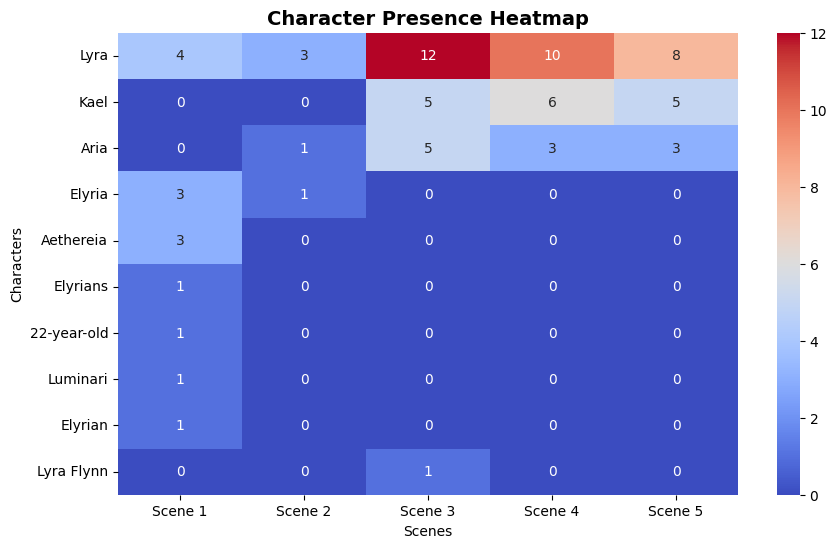

In [72]:
#Create a character-scene matrix

unique_entities = top_entities.index.tolist()
char_scene_matrix = pd.DataFrame(0, index=df_story['Scene'],
                                 columns=unique_entities)
for i, entities in enumerate(df_story['Entities']):
  for ent, _ in entities:
    if ent in char_scene_matrix.columns:
      char_scene_matrix.loc[df_story['Scene'][i],ent] += 1

plt.figure(figsize=(10,6))
sns.heatmap(char_scene_matrix.T, cmap='coolwarm', annot=True, fmt='d')
plt.title('Character Presence Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Scenes')
plt.ylabel('Characters')
plt.show()

### Thematic Summary using Groq LLM

In [79]:
groq_client = Groq(api_key=groq_api_key)
story_text = '\n\n'.join(story_history[-3:])
theme_prompt = f'''
You are an expert literary analyst. Analyze the following story segment and indentify:
- The main themes(e.g, friendship, loss, revenge, hope)
- Emotional tone
- Narrative genre
- Key relationship

Return the results as bullet points
STORY:
{story_text}
'''

try:
  theme_response = groq_client.chat.completions.create(
      model='llama-3.1-8b-instant',
      messages=[{'role':'user','content':theme_prompt}]
  )
  themes_output = theme_response.choices[0].message.content
  display(Markdown('### Thematic Summary'))
  display(Markdown(themes_output))
except Exception as e:
  display(Markdown(f'Could not connect to Groq for theme extraction. Error: {e}'))




### Thematic Summary

Here are the results of the analysis:

**Main themes:**

* **Destiny/Prophecy**: The theme of fate and a predetermined path is present throughout the story, with Lyra being chosen for a greater purpose.
* **Identity/Discovery**: Lyra's journey is one of self-discovery, as she uncovers secrets about her past and her connection to the prophecy.
* **Power/Authority**: The story explores the struggle for power and control, with Kael representing a mysterious authority figure who seeks to guide Lyra on her journey.
* **Trust/Doubt**: The relationship between Lyra and Aria is tested as Lyra is drawn into Kael's world, forcing her to confront her own doubts and trust her instincts.
* **Fear/Revelation**: The story creates a sense of tension and fear as Lyra confronts the unknown, and the revelation of her past and her destiny is slowly revealed.

**Emotional tone:**

* **Excitement/Anticipation**: The story creates a sense of anticipation and excitement as Lyra is drawn into Kael's world, and the mystery of the prophecy is slowly revealed.
* **Fear/Unease**: The story also evokes feelings of fear and unease as Lyra confronts the unknown, and the tension between Lyra and Aria is heightened.
* **Hypnotic/Mesmerizing**: Kael's presence is hypnotic and mesmerizing, drawing Lyra into his world and making her question her own identity.

**Narrative genre:**

* **Fantasy/Adventure**: The story has elements of fantasy and adventure, with a focus on Lyra's journey and her discovery of her powers.
* **Young Adult (YA) Fiction**: The story has a YA vibe, with a focus on Lyra's coming-of-age journey and her relationships with others.

**Key relationship:**

* **Lyra-Aria**: The relationship between Lyra and Aria is central to the story, as they navigate their trust and doubts about Kael and the prophecy.
* **Lyra-Kael**: The relationship between Lyra and Kael is complex and intriguing, with Kael representing a mysterious authority figure who seeks to guide Lyra on her journey.
* **Aria-Kael**: The relationship between Aria and Kael is tense and suspicious, as Aria is wary of Kael's motives and intentions.

In [80]:
#SWave outputs
df_story.to_csv('story_characters_and_themes.csv', index=False)
display(Markdown('Character and Theme saved as `story_characters_and_themes.csv`'))

Character and Theme saved as `story_characters_and_themes.csv`

### Memory Map & Narrative Intelligence Dashboard

## Narrative Memory Map & Intelligence Dashboard

### Character Relationship Network

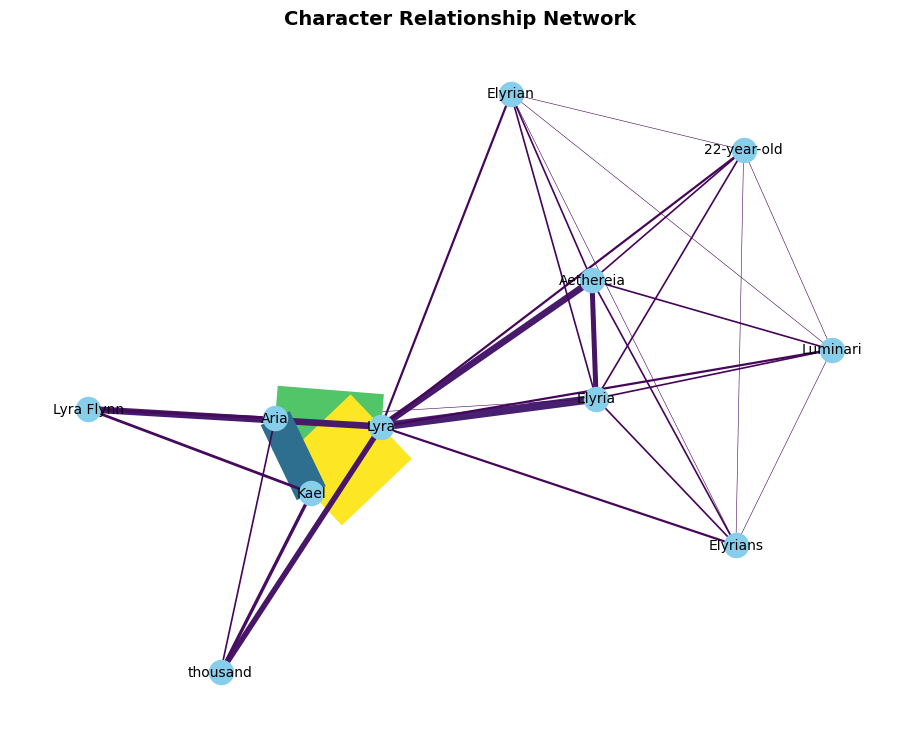

In [82]:
import networkx as nx

display(Markdown('## Narrative Memory Map & Intelligence Dashboard'))

#Check story_history
if not story_history:
  display(Markdown('NO story found. Please generate or load'))
else:
  #Load the entity data
  df_story = pd.read_csv('story_characters_and_themes.csv')

  #Character relationship network
  display(Markdown('### Character Relationship Network'))
  G = nx.Graph()

  #Add edges betweeen co-occuring entities within each scene
  for i, entities_str in enumerate(df_story['Entities']):
    entities = eval(entities_str) if isinstance(entities_str, str) else entities_str
    entity_names = [ent[0] if isinstance(ent, tuple) else str(ent) for ent in entities]
    for e1 in entity_names:
      for e2 in entity_names:
        if e1 != e2:
          if G.has_edge(e1,e2):
            G[e1][e2]['weight'] += 1
          else:
            G.add_edge(e1, e2, weight=1)
  plt.figure(figsize=(9,7))
  pos = nx.spring_layout(G, seed=42)
  weights = [G[u][v]['weight'] for u,v in G.edges()]
  nx.draw(
      G, pos,
      with_labels=True,
      node_color='skyblue',
      edge_color=weights,
      width=[w*0.2 for w in weights],
      font_size=10,
      cmap=plt.cm.viridis
  )
  plt.title('Character Relationship Network', fontsize=14, fontweight='bold')
  plt.show()



### Emotion & Theme Trajectory

### Emotional & Thematic Trajectory

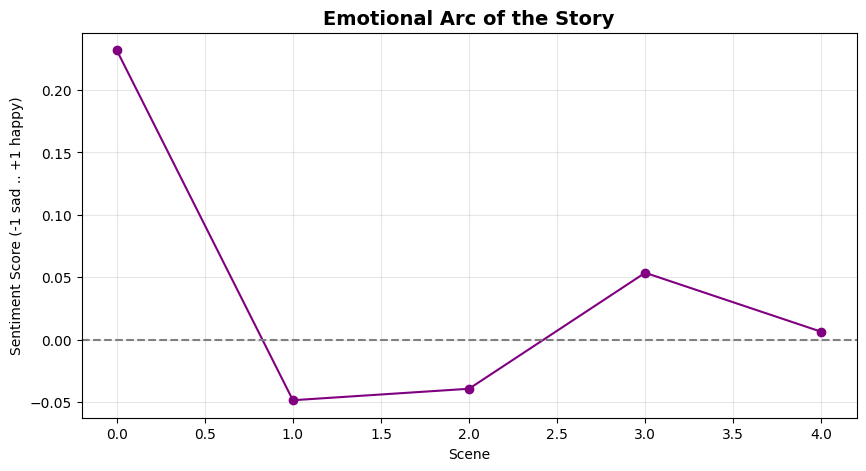

In [83]:
display(Markdown('### Emotional & Thematic Trajectory'))

#Sentiment via Textblob
sentiments = []
for scene_text in df_story['Text']:
  blob = TextBlob(scene_text)
  sentiments.append(blob.sentiment.polarity)

df_story['Sentiment'] = sentiments

plt.figure(figsize=(10,5))
plt.plot(range(len(sentiments)), sentiments, marker='o', color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Emotional Arc of the Story', fontsize=14, fontweight='bold')
plt.xlabel('Scene')
plt.ylabel('Sentiment Score (-1 sad .. +1 happy)')
plt.grid(True, alpha=0.3)
plt.show()

### Relationship Heatmap

### Character Relationship Correlation Heatmap

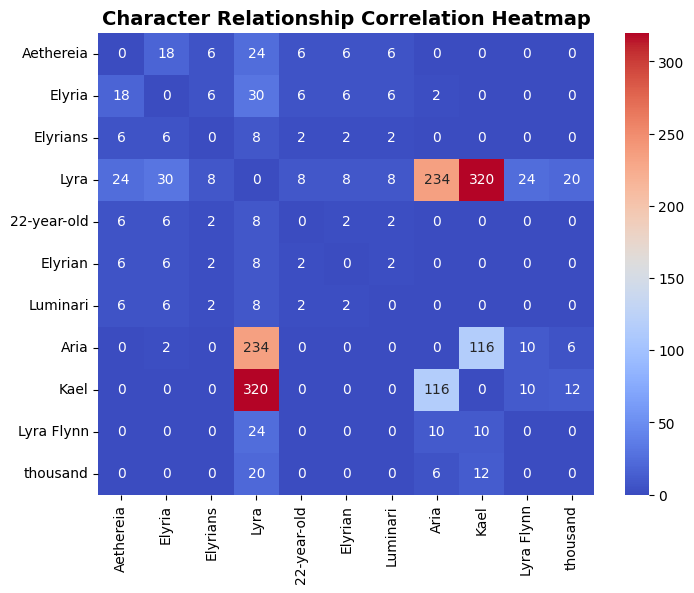

In [86]:
display(Markdown('### Character Relationship Correlation Heatmap'))
characters = list(G.nodes())
relation_matrix = np.zeros((len(characters), len(characters)))

for i, c1 in enumerate(characters):
  for j, c2 in enumerate(characters):
    if G.has_edge(c1,c2):
      relation_matrix[i,j] = G[c1][c2]['weight']

plt.figure(figsize=(8,6))
sns.heatmap(relation_matrix, annot=True, cmap='coolwarm', xticklabels=characters, yticklabels=characters, fmt='.0f')
plt.title('Character Relationship Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

#Save summary

In [89]:
df_story.to_csv('narrative_memory_map.csv', index=False)
display(Markdown('Narrative Memory Map saved as `narrative_memory_map.csv`'))

display(Markdown('''

### Dashboard Summary:
- **Character Netowrk:** Visualizes who appears together
- **Emotional Arc:** Tracks story sentiment
- **Heatmap:** Quantifies relationships
- **File:**`narrative_memory_map.csv` saved for downstream use
------
'''))


Narrative Memory Map saved as `narrative_memory_map.csv`



### Dashboard Summary:
- **Character Netowrk:** Visualizes who appears together
- **Emotional Arc:** Tracks story sentiment
- **Heatmap:** Quantifies relationships
- **File:**`narrative_memory_map.csv` saved for downstream use
------


### Persistent Memory System & Story Recall

In [90]:
import os
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

display(Markdown('## Persistant Memory System & Story Recall Engine'))

#Directoy to save persistant memory

MEMORY_PATH = 'story_memory.json'

#Helper: Save memory to disk---

def save_memory(memory_data):
  with open(MEMORY_PATH, 'w') as f:
    json.dump(memory_data, f, indent=4)

#Helper Load function
def load_memory():
  if os.path.exists(MEMORY_PATH):
    with open(MEMORY_PATH, 'r') as f:
      return json.load(f)
  return {'scenes': [], 'characters': [], 'themes': [], 'sentiments': []}


#Load memory
memory = load_memory()

#If story exists update memory
if story_history:
  display(Markdown('### Updating Long-Term Memory with Current Story....'))
  #Extra simple summaries
  characters = list(set(G.nodes())) if 'G' in locals() else []
  themes = list(df_story['Text'].apply(lambda x: ' '.join(x.split()[:10])))
  sentiments = df_story['Sentiment'].tolist()  if 'Sentiments' in df_story.columns else []

  new_memory = {
      'scenes': story_history,
      'characters': characters,
      'themes': themes,
      'sentiments': sentiments
  }
  memory.update(new_memory)
  save_memory(memory)
  display(Markdown('Memory updated and saved locally (`story_memory.json`)'))
else:
  display(Markdown('No story found. Please generate or load one.'))




## Persistant Memory System & Story Recall Engine

### Updating Long-Term Memory with Current Story....

Memory updated and saved locally (`story_memory.json`)

### Memory Recall System

In [91]:
display(Markdown('### Memory Recall System - Retrieve Relavant Past Context'))

#Create TF-IDF matrix for all stored scenes
if memory.get('scenes'):
  vec = TfidfVectorizer(stop_words='english')
  tfidf_matrix = vec.fit_transform(memory['scenes'])

  def recall_memory(query, top_k=3):
    '''Retrieve most relevant past scenes for a new user prompt'''
    query_vec = vec.transform([query])
    similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_indices = np.argsort(similarities)[-top_k:][::-1]
    recalled = [memory['scenes'][i] for i in top_indices]
    return recalled

  #Example interactive recall
  user_query = input("Enter a new prompt (e.g, 'Remind me what happened with the wizard'): ")
  recalled_scenes = recall_memory(user_query)

  display(Markdown('### Most Relevant Memories: '))
  for i, scene in enumerate(recalled_scenes, 1):
    display(Markdown(f'**Memory {i}:** {scene[:300]}....'))

else:
  display(Markdown('No stored Memory yet.'))

### Memory Recall System - Retrieve Relavant Past Context

Enter a new prompt (e.g, 'Remind me what happened with the wizard'): Remind me on lyra


### Most Relevant Memories: 

**Memory 1:** As Lyra's gaze locked onto Aria, a figure emerged from the shadows of the city's winding alleys. He was a stranger, his features shrouded in an aura of mystery, his eyes gleaming with a knowing intensity. Aria's eyes narrowed, her slender fingers instinctively weaving a subtle spell of protection ar....

**Memory 2:** Lyra's words hung in the air, a fragile promise of determination that Aria and Kael exchanged skeptical glances. The air was heavy with tension as Kael nodded, his eyes never leaving Lyra's face. "Then let us begin," he said, his voice low and hypnotic.

With a wave of his hand, the darkness around ....

**Memory 3:** Lyra's mind reeled, her thoughts tangling like the black tendrils of her hair as she stared at Kael. The weight of the prophecy, long forgotten, now crashed down upon her like a thunderbolt. Aria's grip on her arm tightened, her voice laced with concern. "Lyra, what's happening? What's he talking ab....

### Memory-Aware Interactive Story Continuation

In [94]:
import random

display(Markdown('### Memory-Aware Story Continuation- Llama 3.1 8B Instant'))

#Ensure memory and story exists
if not story_history:
  display(Markdown('No story found. Please generate or load one.'))
else:
  #loading the stored memory
  memory = load_memory()

  #Ask user for input to guide continuation
  display(Markdown('### Continue Your Story'))
  user_input = input('Enter how you would like the story to continue( or leave blank for ai contribution): ')

  #Recall past relevant context from memory---
  if memory.get('scenes'):
    recall_context = recall_memory(user_input if user_input else story_history[-1], top_k=3)
    context_block = '\n\n'.join(recall_context)
  else:
    context_block = story_history[-1]

  #build the final llama prompt
  continuation_prompt = f'''
  You are a creative story engine continuing a story in the genre of {selected_genre}.
  Here is what has happened so far.
  {context_block}

  Now continue the story  with high emotional depth, descriptive worldbuilding and consistent tone.
  Maintain character continuity and connect to earlier events.

  User direction: "{user_input if user_input else 'Continue naturally'}"
  '''

  display(Markdown('### Context prepared for Generation'))
  display(Markdown(f'continuation_prompt[:600]...\n```'))

  #Generate continuation using Ai engine
  response = groq_client.chat.completions.create(
      model='llama-3.1-8b-instant',
      messages=[{'role':'user','content':'Your are a skilled storyteller Ai.'},
                {'role':'user','content':continuation_prompt}],temperature=0.9,max_tokens=700
  )
  new_chapter = response.choices[0].message.content.strip()

  #display and store continuation
  display(Markdown('### New Chapter Generated'))
  display(Markdown(new_chapter))
  story_history.append(new_chapter)

  #optinal: Genreate title suggestion
  title_prompt = f"Suggest a short, cinematic title for this story continuation:\n\n{new_chapter}"
  title_response = groq_client.chat.completions.create(
      model='llama-3.1-8b-instant',
      messages=[{'role':'system','content':'You are a poetic Ai title generator.'},
                {'role':'user','content':title_prompt}], temperature=0.8, max_tokens=30)
  title = title_response.choices[0].message.content.strip()

  #save current story progress
  with open('story_progress.txt', 'w', encoding='utf-8') as f:
    f.write('\n\n'.join(story_history))
  display(Markdown('### Story Progress Saved as `story_progress.txt`'))

### Memory-Aware Story Continuation- Llama 3.1 8B Instant

### Continue Your Story

Enter how you would like the story to continue( or leave blank for ai contribution): 


### Context prepared for Generation

continuation_prompt[:600]...
```

### New Chapter Generated

As Lyra spoke the words, a wave of determination washed over her, but beneath the surface, her fear and uncertainty churned like a stormy sea. Aria's eyes lingered on her, a mixture of concern and warning written across her face. Kael, however, seemed to sense Lyra's turmoil, his gaze piercing the veil of her emotions like a knife.

"Come," he said, his voice low and soothing, "let us walk among the city's winding alleys. There, you will learn the truth about your past and the prophecy that has been whispered about you."

Without waiting for Lyra's response, Kael turned and vanished into the shadows, leaving her with more questions than answers. Lyra hesitated, her heart heavy with the weight of her uncertainty. Aria's hand closed around her arm, a gentle pressure that seemed to anchor her to the present.

"Lyra, I don't like this," Aria whispered, her voice laced with fear. "We don't know what we're getting ourselves into. You're not even sure if you can trust him."

Lyra's gaze fell upon Kael's retreating figure, a flash of anger igniting within her. How could Aria doubt her instincts, her connection to this mysterious stranger? But as she turned back to her sister, Lyra saw the genuine concern etched on Aria's face, and a wave of guilt washed over her.

"I know," Lyra said, her voice barely above a whisper. "But what if he's telling the truth? What if I'm the one, Aria? The chosen one."

Aria's grip on her arm tightened, a spark of determination igniting in her eyes. "We'll face it together, Lyra. Always."

With a newfound sense of resolve, Lyra nodded, and together, the sisters followed Kael into the winding alleys of the city. The architecture seemed to shift and twist around them, ancient stone buildings creaking and groaning as if they themselves were alive. The air was thick with the scent of incense and the whispers of the city's inhabitants, their voices a gentle hum that seemed to vibrate through every molecule of air.

As they walked, Lyra felt the weight of her destiny settling upon her, a sense of purpose that seemed to course through her veins like liquid fire. She tried to shake it off, to focus on the present moment, but Kael's words lingered in her mind like a mantra: "You are the chosen one, Lyra. The bringer of light to the darkness."

The alleys seemed to grow narrower, the shadows deepening into dark pools that seemed to swallow the light around them. Lyra's heart pounded in her chest, her senses on high alert as she tried to navigate the shifting landscape. Aria's hand remained a steady presence at her side, a comforting anchor in the midst of uncertainty.

And yet, despite the turmoil within her, Lyra felt a thrill of excitement, a sense of awe at the mysterious world unfolding before her. She had always known that there was more to her life than the mundane routines of her daily existence, and now, it seemed, that door was finally opening.

As they turned a corner, a massive stone gate loomed before them, its entrance guarded by two imposing statues with eyes that seemed to watch Lyra with an unnerving intensity. Kael approached the

### Story Progress Saved as `story_progress.txt`

### Scene Visualizer and Character Portrait Generator

In [ ]:
# ============================================================
# 🎨 Cell 16: Scene Visualizer & Character Portrait Generator
# ============================================================
from diffusers import StableDiffusionXLPipeline
import torch
from PIL import Image
from IPython.display import Markdown, display
import random

display(Markdown("## 🎨 Scene Visualizer & Character Portrait Generator"))

# --- Ensure we have a story context ---
if not story_history:
    display(Markdown("⚠️ No story found. Please generate or continue one first."))
else:
    # --- Get the latest scene for inspiration ---
    latest_scene = story_history[-1]

    # --- Let user choose visualization type ---
    display(Markdown("### ✨ What would you like to visualize?"))
    vis_choice = input("Type: 'scene', 'character', or 'mood': ").strip().lower()

    # --- Prompt logic based on user choice ---
    if vis_choice == "character":
        image_prompt = f"A detailed portrait of the main character from the following text, artistic lighting, cinematic style:\n{latest_scene[:400]}"
    elif vis_choice == "mood":
        image_prompt = f"A cinematic artwork capturing the mood and atmosphere of this scene:\n{latest_scene[:400]}"
    else:
        image_prompt = f"A stunning visual depiction of the scene described below, hyper-detailed, concept art style:\n{latest_scene[:400]}"

    # --- Display prepared prompt ---
    display(Markdown("### 🧠 Generated Image Prompt"))
    display(Markdown(f"```\n{image_prompt[:600]}...\n```"))

    # --- Prepare pipeline ---
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model_id = "stabilityai/stable-diffusion-xl-base-1.0"

    pipe = StableDiffusionXLPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float16 if device == "cuda" else torch.float32,
        variant="fp16" if device == "cuda" else None
    )
    pipe = pipe.to(device)

    # --- Generate the image ---
    display(Markdown("### 🎨 Generating visual... please wait ⏳"))
    if device == "cuda":
        with torch.autocast("cuda"):
            image = pipe(
                prompt=image_prompt,
                num_inference_steps=30,
                guidance_scale=8.0,
                width=1024,
                height=1024
            ).images[0]
    else:
        with torch.no_grad():
            image = pipe(
                prompt=image_prompt,
                num_inference_steps=30,
                guidance_scale=8.0,
                width=1024,
                height=1024
            ).images[0]

    # --- Display result ---
    display(Markdown("## 🖼️ Generated Visual"))
    display(image)

    # --- Save the image ---
    image_filename = f"{vis_choice}_{selected_genre}_{len(story_history)}.png"
    image.save(image_filename)
    display(Markdown(f"✅ Image saved as `{image_filename}`"))

    # --- Update memory with visual cue ---
    if "visuals" not in memory:
        memory["visuals"] = []
    memory["visuals"].append({"type": vis_choice, "prompt": image_prompt, "file": image_filename})
    save_memory(memory)
    display(Markdown("🧠 Visual context saved to memory"))


### Story Dashboard & Manager


In [102]:
from IPython.display import display, Markdown, clear_output

display(Markdown('### interactive Story Dashboard'))

#Ensure we have some story history
if not story_history:
  print('No story found. Please generate')
else:
  #dropwdown to select a story segment
  story_options = [f"Scene {i+1}" for i in range(len(story_history))]
  scene_dropdown = widgets.Dropdown(
      options=story_options,
      descriptions='Scenes: ',
      style={'descriptive_width':'initial'},
      layout=widgets.Layout(width='50%')
  )

  #button to view story
  view_button = widgets.Button(description='View Scene', button_style='info')
  continue_button = widgets.Button(description='Continue from here', button_style='success')
  download_button = widgets.Button(description='Download Story', button_style='warning')

  output_area = widgets.Output()

  def view_scene_callback(b):
    with output_area:
      clear_output()
      index = story_options.index(scene_dropdown.value)
      display(Markdown(f'### {scene_dropdown.value}'))
      display(Markdown(story_history[index]))

      #If an image exists , display it
      image_filename = f'scene_are_{selected_genre}_{index+1}.png'
      if os.path.exists(image_filename):
        display(Markdown('### Concept art'))
        display(Image.open(image_filename))
      else:
        display(Markdown('No concept are found for this scene'))


  def continue_scene_callback(b):
    with output_area:
      clear_output()
      index = story_options.index(scene_dropdown.value)
      display(Markdown(f'### Continuing from {scene_dropdown.value}....'))
      base_text = story_history[index]
      user_prompt = input('Enter your idea or twist: ')

      #Generate using ai model
      continuation_prompt = f"Continue the following story: \n{base_text}\n User Input: {user_prompt}."
      continuation = groq_client.chat.completions.create(
          model='llama-3.1-8b-instant',
          messages=[{'role':'system','content':'You are a creative story continuation Ai'},
                    {'role':'user','content':continuation_prompt}]
      )
      next_scene = continuation.choices[0].message.content
      story_history.append(next_scene)
      display(Markdown(f'### New Scene: {next_scene}'))

  def download_story_callback(b):
    with output_area:
      clear_output()
      filename=f'{selected_genre}_story_log.txt'
      with open(filename, 'w', encoding='utf-8') as f:
        for i, scene in enumerate(story_history, 1):
          f.write(f'Scene {i}:\n{'='*30}\n{scene}\n\n')


      display(Markdown('### Story Saved as `{filename}`...'))
      display(Markdown('You can find it in your file browser'))

  #bind button actions
  view_button.on_click(view_scene_callback)
  continue_button.on_click(continue_scene_callback)
  download_button.on_click(download_story_callback)

  #Display the widgets
  dashboard = widgets.VBox([
    scene_dropdown,
    widgets.HBox([view_button, continue_button, download_button]),
    output_area
  ])
  display(dashboard)


### interactive Story Dashboard